**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [84]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [85]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Regression

In [86]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Yiyang/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Yiyang/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [87]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [88]:
R_train=R_train.dropna()

In [89]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [90]:
R_train.head()

,theta,theta_past_ma10
1,56.882353,60.312500
2,55.314286,58.597426
3,52.486486,57.503046
4,47.536585,56.248906
5,44.622426,54.506442


In [91]:
R_test.head()

,theta,theta_past_ma10
52,28.246110,29.010680
53,28.061798,28.882839
54,27.997199,28.748191
55,27.816412,28.614282
56,27.561983,28.469453


# Machine Learning Regression

## important global packages

In [92]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [93]:
R_train.head()

,theta,theta_past_ma10
1,56.882353,60.312500
2,55.314286,58.597426
3,52.486486,57.503046
4,47.536585,56.248906
5,44.622426,54.506442


In [94]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [95]:
R_test.head()

,theta,theta_past_ma10
52,28.246110,29.010680
53,28.061798,28.882839
54,27.997199,28.748191
55,27.816412,28.614282
56,27.561983,28.469453


In [96]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [97]:
from sklearn import linear_model

In [98]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [99]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.9280159365003023


In [100]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,28.232377
1,28.131672
2,28.025604
3,27.920120
4,27.806032
5,27.677508
6,27.553757
7,27.434671
8,27.316563
9,27.202974


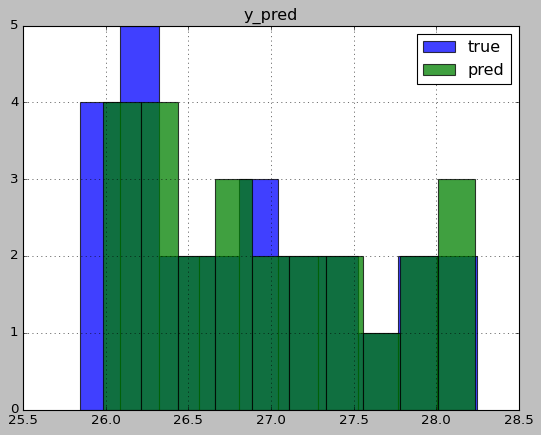

In [101]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-103-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [104]:
# calculate R2
from sklearn.metrics import r2_score

In [105]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -5.296415687139621


In [106]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,28.461114
1,28.461114
2,28.461114
3,28.461114
4,28.461114
5,28.461114
6,28.461114
7,28.461114
8,28.461114
9,28.461114


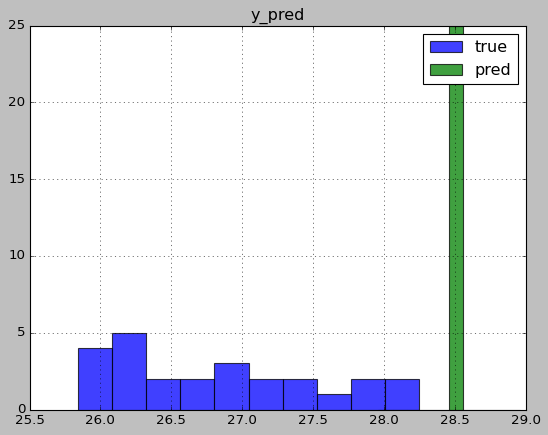

In [107]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
